

# **Brain Tumor**
**A brain tumor is an abnormal growth of cells in or around the brain. Tumors can be cancerous (malignant) or noncancerous (benign).**
## **Types:**

**Malignant (cancerous):** These tumors grow uncontrollably and can spread to other parts of the brain or body.

**Benign (noncancerous):** These tumors grow slowly and usually don't spread. However, even benign tumors can cause problems if they grow large enough to press on brain tissue.

In [ ]:
## Downloading Dataset : https://www.kaggle.com/datasets/fernando2rad/brain-tumor-mri-images-44c
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d fernando2rad/brain-tumor-mri-images-44c

Dataset URL: https://www.kaggle.com/datasets/fernando2rad/brain-tumor-mri-images-44c
License(s): Community Data License Agreement - Sharing - Version 1.0
brain-tumor-mri-images-44c.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
## Importing Libraries
import zipfile
import os
import shutil
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt

In [ ]:
zipis=zipfile.ZipFile('/content/brain-tumor-mri-images-44c.zip')
zipis.extractall('/content/Brain_Tumor')
zipis.close()

# **About the Dataset**

In [ ]:
Dataset_dir='/content/Brain_Tumor'
classes=os.listdir(Dataset_dir)
print("There are total of : ",len(classes)," Different Classes\nThey are :-")
Total=0
for single_type in classes:
    print(f"* {single_type:<25}  {len(os.path.join(Dataset_dir, single_type)):>5} Images")
    Total=Total+len(os.path.join(Dataset_dir, single_type))

There are total of :  44  Different Classes
They are :-
* Ganglioglioma T2              37 Images
* Carcinoma T2                  33 Images
* Tuberculoma T2                35 Images
* Germinoma T1                  33 Images
* Granuloma T1                  33 Images
* Tuberculoma T1                35 Images
* Astrocitoma T2                35 Images
* Ependimoma T1C+               36 Images
* Meningioma T1                 34 Images
* Glioblastoma T1               36 Images
* Germinoma T1C+                35 Images
* Meningioma T2                 34 Images
* Astrocitoma T1                35 Images
* Neurocitoma T2                35 Images
* Ganglioglioma T1              37 Images
* Meduloblastoma T2             38 Images
* Meduloblastoma T1C+           40 Images
* Schwannoma T1                 34 Images
* Granuloma T1C+                35 Images
* Germinoma T2                  33 Images
* _NORMAL T2                    31 Images
* Carcinoma T1                  33 Images
* Neurocitoma T1C+  

In [ ]:
print(f"Total of {Total} Images")

Total of 1560 Images


## **Class Wise Sample Images**

Class Wise Sample Images




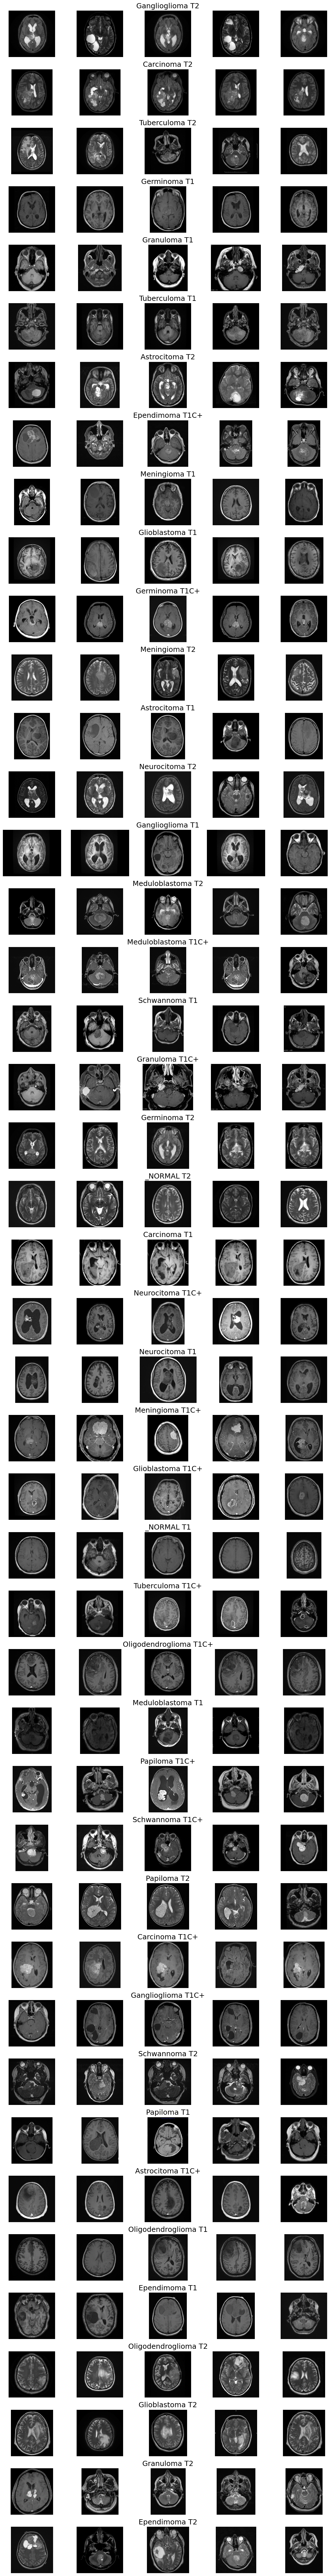

In [ ]:
print("Class Wise Sample Images\n\n")
rows = len(classes)
fig, axs = plt.subplots(rows,5, figsize=(12, 90))

for i, single_type in enumerate(classes):
    class_dir = os.path.join(Dataset_dir, single_type)
    images = os.listdir(class_dir)

    axs[i, 2].set_title(single_type, fontsize=18)

    for j in range(5):
        image_path = os.path.join(class_dir, images[j])
        image = cv2.imread(image_path)
        axs[i, j].imshow(image)
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()

### **Splitting Dataset ratio: 4:1**

In [ ]:
Old_dataset_dir=os.path.join(os.getcwd(),"Old_Dataset")
os.rename(Dataset_dir,Old_dataset_dir)

In [ ]:
split_ratio=0.8

In [ ]:
Dataset_Dir=os.path.join(os.getcwd(),"Dataset")
train_Dir=os.path.join(Dataset_Dir,"Train")
test_dir=os.path.join(Dataset_Dir,"Test")

if(not os.path.exists(Dataset_Dir)):
    os.mkdir(Dataset_Dir)
    if(not os.path.exists(train_Dir)):
        os.mkdir(train_Dir)
    if(not os.path.exists(test_dir)):
        os.mkdir(test_dir)
    print("Dataset Directory Created.")
else:
    print("Dataset Directory found.")

Dataset Directory Created.


In [ ]:
for classes in os.listdir(Old_dataset_dir):
    train_class_path=os.path.join(train_Dir,classes)
    test_class_path=os.path.join(test_dir,classes)
    if(not os.path.exists(train_class_path)):
        os.mkdir(train_class_path)
    if(not os.path.exists(test_class_path)):
        os.mkdir(test_class_path)
    class_path=os.path.join(Old_dataset_dir,classes)
    files=os.listdir(class_path)
    files.sort()
    train_files=files[0:int(len(files)*split_ratio)]
    test_files=files[int(len(files)*split_ratio):]
    for file in tqdm(train_files,"Copying :"):
        input_path=os.path.join(class_path,file)
        output_path=os.path.join(train_class_path,file)
        shutil.copy(input_path,output_path)
    for file in tqdm(test_files,"Copying :"):
        input_path=os.path.join(class_path,file)
        output_path=os.path.join(test_class_path,file)
        shutil.copy(input_path,output_path)

Copying :: 100%|██████████| 12/12 [00:00<00:00, 1129.09it/s]


In [ ]:
shutil.rmtree(Old_dataset_dir)

In [ ]:


# Use the dirs_exist_ok argument to allow overwriting the destination directory if it exists
shutil.copytree('/content/Dataset', '/content/drive/MyDrive/Brain_Tumor/Dataset', dirs_exist_ok=True)

'/content/drive/MyDrive/Brain_Tumor/Dataset'

Model Building and Training

In [ ]:
pip install ultralytics

In [ ]:
from ultralytics import YOLO
import os
import shutil

In [ ]:
# Check if the destination directory exists
if os.path.exists('/content/Dataset'):
    # If it exists, remove it
    shutil.rmtree('/content/Dataset')

# Now, copy the source directory to the destination directory
shutil.copytree('/content/drive/MyDrive/Brain_Tumor/Dataset', '/content/Dataset')

'/content/Dataset'

In [ ]:
model=YOLO("yolov8n-cls.pt")

In [ ]:
import os
import shutil

# Check if the directory exists before attempting to remove it
if os.path.exists('/content/runs'):
    shutil.rmtree('/content/runs')

# Proceed with other operations
os.rename('/content/Dataset/Train','/content/Dataset/train')
os.rename('/content/Dataset/Test','/content/Dataset/test')

In [ ]:
result=model.train(data='/content/Dataset',epochs=25)

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/Dataset, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,

train: Scanning /content/Dataset/train... 3564 images, 0 corrupt: 100%|██████████| 3564/3564 [00:00<?, ?it/s]
val: Scanning /content/Dataset/test... 915 images, 0 corrupt: 100%|██████████| 915/915 [00:00<?, ?it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)


TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/classify/train2
Starting training for 25 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:22<00:00,  1.27it/s]

                   all      0.392      0.774



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:22<00:00,  1.27it/s]

                   all      0.564      0.858



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:23<00:00,  1.21it/s]

                   all      0.645      0.892



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:23<00:00,  1.21it/s]

                   all      0.707      0.923



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:22<00:00,  1.28it/s]

                   all      0.717      0.941



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:23<00:00,  1.24it/s]

                   all      0.785      0.946



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:22<00:00,  1.31it/s]

                   all      0.784      0.951



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:23<00:00,  1.25it/s]

                   all       0.81      0.962



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:22<00:00,  1.29it/s]

                   all      0.815      0.975



      Epoch    GPU_mem       loss  Instances       Size


      10/25         0G     0.4433         12        224: 100%|██████████| 223/223 [03:35<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:23<00:00,  1.24it/s]

                   all      0.833      0.976



      Epoch    GPU_mem       loss  Instances       Size


      11/25         0G     0.4102         12        224: 100%|██████████| 223/223 [03:34<00:00,  1.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:23<00:00,  1.25it/s]

                   all      0.845      0.975



      Epoch    GPU_mem       loss  Instances       Size


      12/25         0G     0.3813         12        224: 100%|██████████| 223/223 [03:35<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:22<00:00,  1.27it/s]

                   all      0.854      0.967



      Epoch    GPU_mem       loss  Instances       Size


      13/25         0G     0.3504         12        224: 100%|██████████| 223/223 [03:35<00:00,  1.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:22<00:00,  1.31it/s]

                   all       0.86      0.975



      Epoch    GPU_mem       loss  Instances       Size


      14/25         0G     0.3105         12        224: 100%|██████████| 223/223 [03:32<00:00,  1.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:23<00:00,  1.23it/s]

                   all      0.867      0.978



      Epoch    GPU_mem       loss  Instances       Size


      15/25         0G     0.3267         12        224: 100%|██████████| 223/223 [03:34<00:00,  1.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:22<00:00,  1.32it/s]

                   all      0.873      0.975



      Epoch    GPU_mem       loss  Instances       Size


      16/25         0G     0.2671         12        224: 100%|██████████| 223/223 [03:35<00:00,  1.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:22<00:00,  1.30it/s]

                   all      0.871      0.977



      Epoch    GPU_mem       loss  Instances       Size


      17/25         0G     0.2669         12        224: 100%|██████████| 223/223 [03:35<00:00,  1.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:23<00:00,  1.25it/s]

                   all      0.871      0.974



      Epoch    GPU_mem       loss  Instances       Size


      18/25         0G     0.2436         12        224: 100%|██████████| 223/223 [03:37<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:22<00:00,  1.32it/s]

                   all      0.869      0.978



      Epoch    GPU_mem       loss  Instances       Size


      19/25         0G     0.2351         12        224: 100%|██████████| 223/223 [03:35<00:00,  1.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:22<00:00,  1.26it/s]

                   all      0.882      0.978



      Epoch    GPU_mem       loss  Instances       Size


      20/25         0G     0.2313         12        224: 100%|██████████| 223/223 [03:36<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:22<00:00,  1.27it/s]

                   all      0.878      0.981



      Epoch    GPU_mem       loss  Instances       Size


      21/25         0G     0.2007         12        224: 100%|██████████| 223/223 [03:36<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:23<00:00,  1.23it/s]

                   all      0.894      0.978



      Epoch    GPU_mem       loss  Instances       Size


      22/25         0G     0.1939         12        224: 100%|██████████| 223/223 [03:39<00:00,  1.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:23<00:00,  1.24it/s]

                   all      0.895      0.977



      Epoch    GPU_mem       loss  Instances       Size


      23/25         0G     0.1924         12        224: 100%|██████████| 223/223 [03:37<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:22<00:00,  1.29it/s]

                   all      0.901      0.979



      Epoch    GPU_mem       loss  Instances       Size


      24/25         0G     0.1759         12        224: 100%|██████████| 223/223 [03:37<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:22<00:00,  1.28it/s]

                   all      0.901      0.979



      Epoch    GPU_mem       loss  Instances       Size


      25/25         0G     0.1799         12        224: 100%|██████████| 223/223 [03:35<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:23<00:00,  1.25it/s]

                   all      0.897       0.98



25 epochs completed in 1.674 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 3.1MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 3.1MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1,491,244 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/Dataset/train... found 3564 images in 44 classes ✅ 
val: None...
test: /content/Dataset/test... found 915 images in 44 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:22<00:00,  1.29it/s]


                   all      0.901      0.979
Speed: 0.0ms preprocess, 15.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2


In [ ]:
shutil.copytree('/content/runs','/content/drive/MyDrive/Brain_Tumor/runs')

'/content/drive/MyDrive/Brain_Tumor/runs'

Results and Accuracy

In [ ]:
# Print the results for a detailed evaluation
print(result)

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ec54205b4c0>
curves: []
curves_results: []
fitness: 0.9398907124996185
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9005464315414429, 'metrics/accuracy_top5': 0.9792349934577942, 'fitness': 0.9398907124996185}
save_dir: PosixPath('runs/classify/train2')
speed: {'preprocess': 0.0009927593293737192, 'inference': 15.372353955044773, 'loss': 7.97334264536373e-05, 'postprocess': 6.462055477288251e-05}
task: 'classify'
top1: 0.9005464315414429
top5: 0.9792349934577942


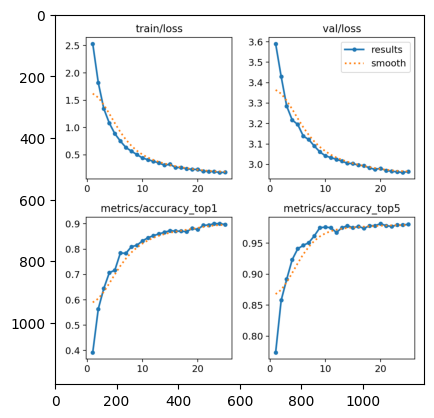

In [ ]:
plt.imshow(cv2.imread('/content/runs/classify/train2/results.png')[:,:,::-1])

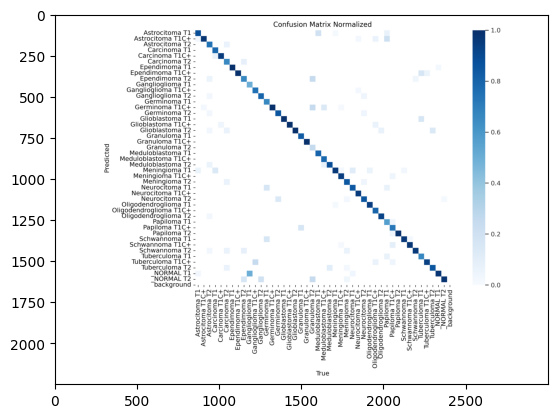

In [ ]:
plt.imshow(cv2.imread('/content/runs/classify/train2/confusion_matrix_normalized.png')[:,:,::-1])